### Tutorial 4 - Statistical Analysis

Packages to install: 
* `scipy`
* `statsmodels`

### Question 1

#### Descriptive Statistics

1. Load the data below into a Pandas DataFrame.
3. Compute the mean, median, and standard deviation of the "exam_score" column.
4. Create a scatter plot to examine the relationship between "study_hours" and "exam_score".Add appropriate labels and a title to the plot.
5. Compute the correlation coefficient between "study_hours" and "exam_score". Interpret the strength and direction of the correlation.
6. Perform a one-sample t-test (**ttest_1samp**) to determine if the mean "exam_score" is significantly different from 75.
Use a significance level of 0.05.

```
data = {
'student_id':[1,2,3,4,5,6,7,8,9,10],
'exam_score':[85,92,78,88,95,83,90,88,75,92],
'study_hours':[6,8,4,7,9,5,7,6,3,8],
'subject':['Math','Science','English','Math','Science','English','Math','Science','English','Math']
}
```

### Question 2

#### Two sample t-test

1. Load the data into a dataframe, which contains information about a marketing campaign.
2. Perform a two-sample t-test to determine if there is a significant difference in the average amount spent by customers between two different marketing channels ("Channel_A" and "Channel_B").
3. Create a bar plot to visualize the average amount spent by customers for each channel.
Interpret the results of the t-test and the bar plot.

Data:  
```
data = {
'Customer_ID':[1,2,3,4,5,6,7,8,9,10],
'Amount_Spent':[50.25,75.5,60.75,80,55.25,90.5,65,70.75,85.25,95],
'Marketing_Channel':['Channel_A','Channel_B','Channel_A','Channel_B','Channel_A','Channel_B','Channel_A','Channel_B','Channel_A','Channel_B']
}
```

In [1]:
import pandas as pd

# Create the dataframe from the provided data
data = {
    'Customer_ID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Amount_Spent': [50.25, 75.5, 60.75, 80, 55.25, 90.5, 65, 70.75, 85.25, 95],
    'Marketing_Channel': ['Channel_A', 'Channel_B', 'Channel_A', 'Channel_B', 'Channel_A', 'Channel_B', 'Channel_A', 'Channel_B', 'Channel_A', 'Channel_B']
}

df_marketing = pd.DataFrame(data)

# Display the dataframe
df_marketing

,Customer_ID,Amount_Spent,Marketing_Channel
0,1,50.25,Channel_A
1,2,75.50,Channel_B
2,3,60.75,Channel_A
3,4,80.00,Channel_B
4,5,55.25,Channel_A
5,6,90.50,Channel_B
6,7,65.00,Channel_A
7,8,70.75,Channel_B
8,9,85.25,Channel_A
9,10,95.00,Channel_B


In [ ]:
%pip install matplotlib

In [13]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

# Group data by marketing channel
channel_a = df_marketing[df_marketing['Marketing_Channel'] == 'Channel_A']['Amount_Spent']
channel_b = df_marketing[df_marketing['Marketing_Channel'] == 'Channel_B']['Amount_Spent']

# Perform two-sample t-test
t_stat, p_value = stats.ttest_ind(channel_a, channel_b)

# Calculate means for interpretation
mean_a = channel_a.mean()
mean_b = channel_b.mean()

# Print results
print(f"Channel A mean spending: ${mean_a:.2f}")
print(f"Channel B mean spending: ${mean_b:.2f}")
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")
print("\nInterpretation:")
if p_value < 0.05:
    print("There is a significant difference in spending between the two channels (p < 0.05)")
else:
    print("There is no significant difference in spending between the two channels (p >= 0.05)")


Channel A mean spending: $63.30
Channel B mean spending: $82.35
t-statistic: -2.5235
p-value: 0.0356

Interpretation:
There is a significant difference in spending between the two channels (p < 0.05)


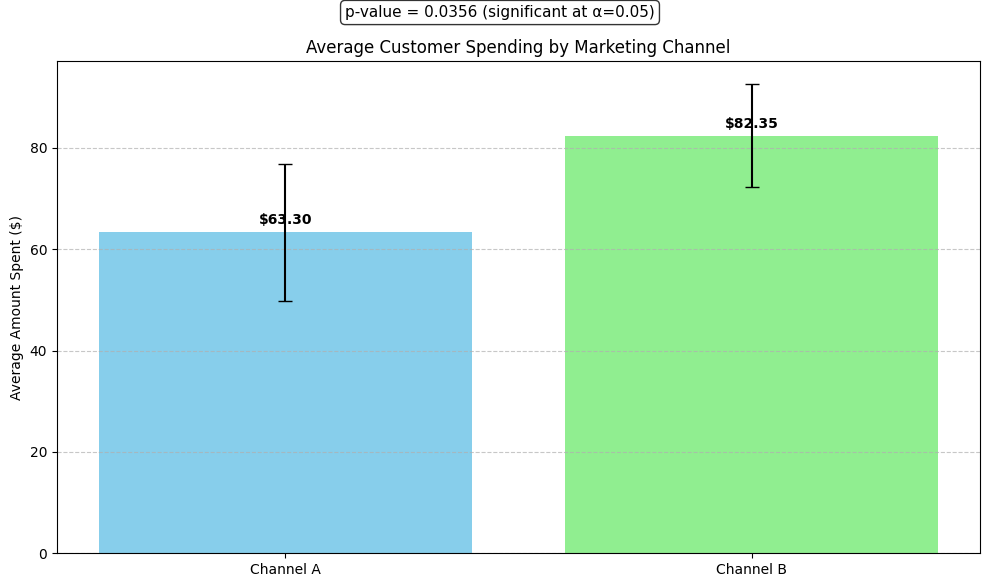


Interpretation of Results:
1. Channel B shows significantly higher average spending ($82.35) compared to Channel A ($63.30).
2. The p-value of 0.0356 is less than 0.05, confirming the difference is statistically significant.
3. The error bars (standard deviations) show some variability in spending within each channel.
4. Marketing Channel B appears to be more effective at generating higher customer spending.


In [18]:
# Create bar plot
plt.figure(figsize=(10, 6))
channels = ['Channel A', 'Channel B']
means = [mean_a, mean_b]
bars = plt.bar(channels, means, color=['skyblue', 'lightgreen'])

# Add error bars (standard deviation)
std_dev = [channel_a.std(), channel_b.std()]
plt.errorbar(channels, means, yerr=std_dev, fmt='none', color='black', capsize=5)

# Add labels and title
plt.ylabel('Average Amount Spent ($)')
plt.title('Average Customer Spending by Marketing Channel')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add values on top of each bar
for bar, mean in zip(bars, means):
    plt.text(bar.get_x() + bar.get_width()/2, mean + 1, f'${mean:.2f}', 
             ha='center', va='bottom', fontweight='bold')

# Add annotation about statistical significance
plt.annotate(f'p-value = {p_value:.4f} (significant at α=0.05)', 
             xy=(0.5, 0.95), xycoords='figure fraction',
             ha='center', fontsize=11, bbox=dict(boxstyle="round,pad=0.3", fc="white", alpha=0.8))

plt.tight_layout()
plt.show()

# Interpretation of results
print("\nInterpretation of Results:")
print("1. Channel B shows significantly higher average spending ($82.35) compared to Channel A ($63.30).")
print("2. The p-value of 0.0356 is less than 0.05, confirming the difference is statistically significant.")
print("3. The error bars (standard deviations) show some variability in spending within each channel.")
print("4. Marketing Channel B appears to be more effective at generating higher customer spending.")

### Question 3

1. Fit a simple linear regression model to predict "exam_score" based on "study_hours". Use OLS package by `statsmodels` to fit an OLS model.  
   Before fitting, please add the y-intercept using the `sm.add_constant()` function.  
4. Interpret the coefficients and assess the model's goodness of fit.
5. Do a scatter plot for both variables
6. Visualize the regression line on a scatter plot.

```
data = {
'student_id':[1,2,3,4,5,6,7,8,9,10],
'exam_score':[85,92,78,88,95,83,90,88,75,92],
'study_hours':[6,8,4,7,9,5,7,6,3,8],
'subject':['Math','Science','English','Math','Science','English','Math','Science','English','Math']
}
```

In [ ]:
import pandas as pd

data_exam = {
'student_id':[1,2,3,4,5,6,7,8,9,10],
'exam_score':[85,92,78,88,95,83,90,88,75,92],
'study_hours':[6,8,4,7,9,5,7,6,3,8],
'subject':['Math','Science','English','Math','Science','English','Math','Science','English','Math']
}


### Question 4

#### Analysis of Variance (ANOVA)

1. Import the data into a dataframe
2. Groupby the data based on subject
3. Conduct a one-way ANOVA to compare the mean "exam_score" across different "subject" categories.  
4. Determine if there are significant differences in exam scores among the subjects.  
5. Use boxplot to visualize the exam scores by subject

Use the data below:  

```
data = {
'student_id':[1,2,3,4,5,6,7,8,9,10],
'exam_score':[85,92,78,88,95,83,90,88,75,92],
'study_hours':[6,8,4,7,9,5,7,6,3,8],
'subject':['Math','Science','English','Math','Science','English','Math','Science','English','Math']
}
```


In [22]:
import pandas as pd

data_anova = {
'student_id':[1,2,3,4,5,6,7,8,9,10],
'exam_score':[85,92,78,88,95,83,90,88,75,92],
'study_hours':[6,8,4,7,9,5,7,6,3,8],
'subject':['Math','Science','English','Math','Science','English','Math','Science','English','Math']
}

df_anova = pd.DataFrame(data_anova)

In [ ]:
doc = doc[doc for doc in df_anova]

In [ ]:
eng= doc[0][1]
math= doc[1][1]
science= doc[2][1]

In [29]:
import scipy as sc

In [ ]:
sc.stats.f_oneway(eng['exam_score'],
                  math['exam_score'],
                  science['exam_score'])

In [ ]:
plt.boxplot()